# Assignment Tasks:

## Task 1: Exploratory Data Analysis (EDA) and Business Insights


Sales Growth & Trends: We’re seeing consistent growth or seasonal fluctuations in sales. By focusing on peak periods, we can further boost sales through targeted marketing campaigns and optimized inventory management.

Regional Customer Distribution: Sales are concentrated in certain areas, suggesting opportunities for regional marketing. Expanding efforts in underrepresented areas will balance the customer base and increase engagement.

Popular Products: Certain products are performing well. To capitalize on this, we can introduce complementary items or expand stock to meet demand, driving more sales.

Price Sensitivity: Some customers are price-sensitive, offering an opportunity for tailored pricing strategies. Time-limited discounts or promotional bundles can drive sales without hurting the brand’s value.

Customer Loyalty: High-value customers contribute significantly to revenue. By offering personalized rewards and targeted loyalty programs, we can increase repeat purchases and customer retention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

In [3]:
# Display basic info about the dataset
print("Products Dataframe:")
print(products.info())
print("\nTransactions Dataframe:")
print(transactions.info())
print("\nCustomers Dataframe:")
print(customers.info())

# Display the first few rows to get a sense of the data
print("\nFirst few rows of Products:")
print(products.head())
print("\nFirst few rows of Transactions:")
print(transactions.head())
print("\nFirst few rows of Customers:")
print(customers.head())



Products Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None

Transactions Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int6

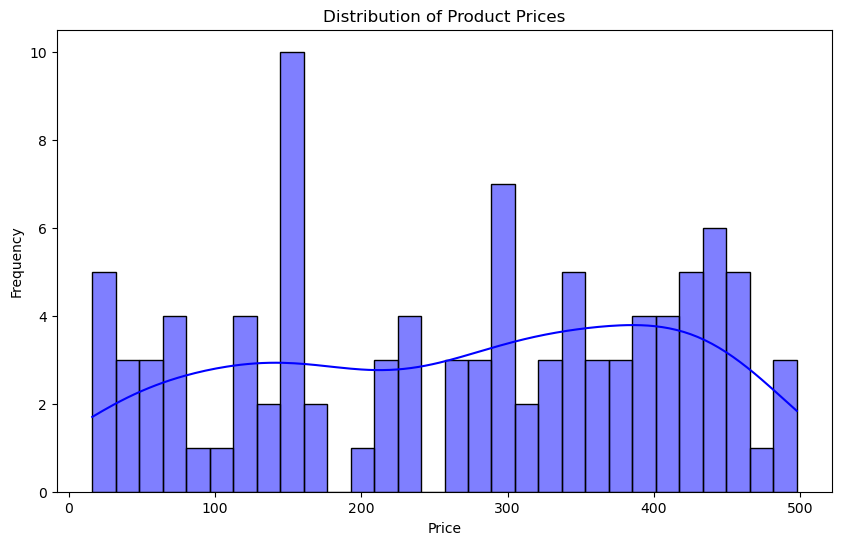

C:\Users\gokul\AppData\Local\Temp\ipykernel_17416\847584733.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='Set2')


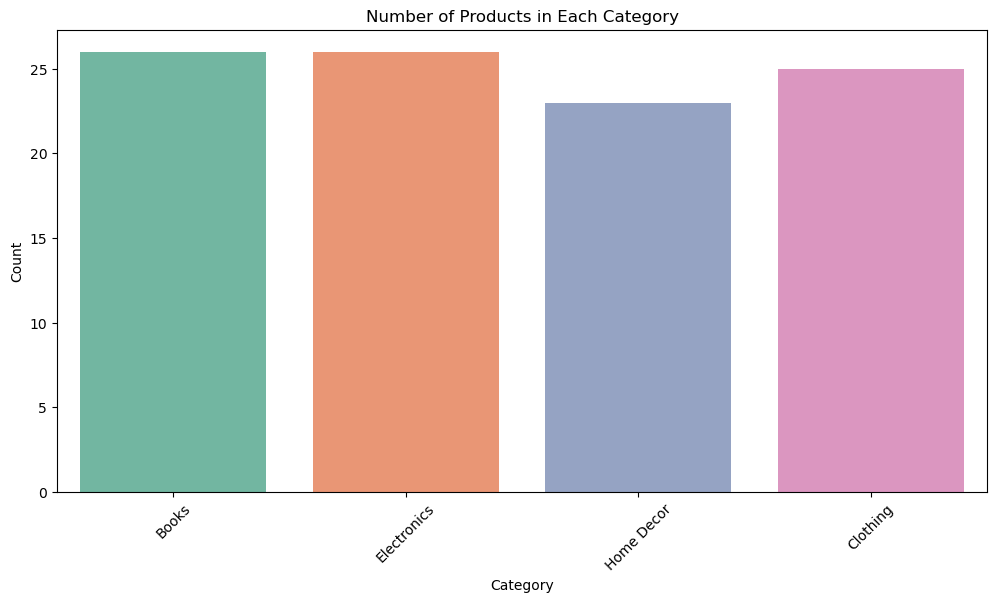

In [4]:
# EDA: Distribution of Prices
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# EDA: Count of Products in Each Category
plt.figure(figsize=(12,6))
sns.countplot(data=products, x='Category', palette='Set2')
plt.title('Number of Products in Each Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

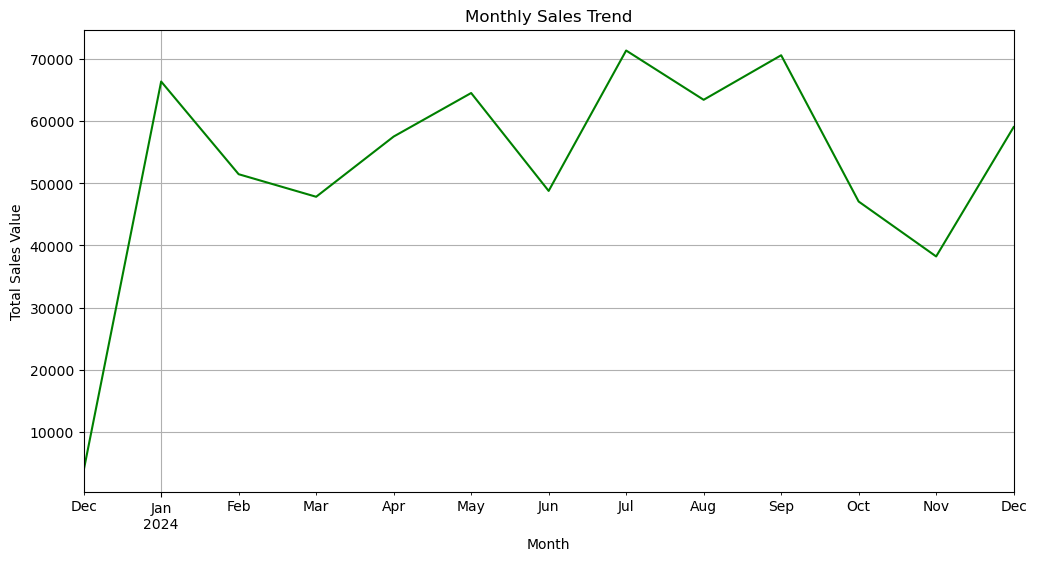

C:\Users\gokul\AppData\Local\Temp\ipykernel_17416\3044900396.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='ProductID', y='Quantity', palette='Blues')


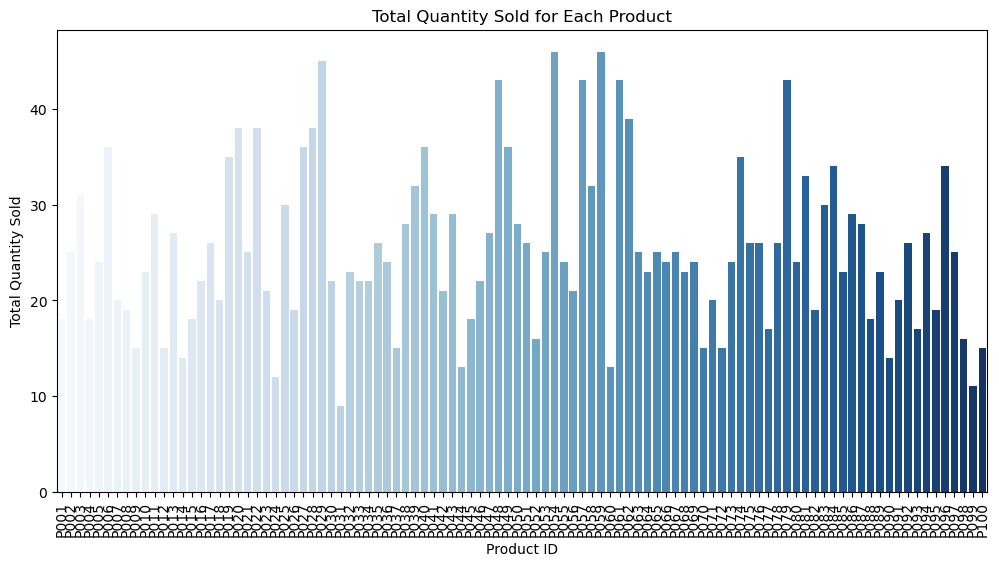

In [5]:
# EDA: Total Transaction Value Over Time (Date-based)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

# EDA: Total Quantity Sold for Each Product
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=product_sales, x='ProductID', y='Quantity', palette='Blues')
plt.title('Total Quantity Sold for Each Product')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()



C:\Users\gokul\AppData\Local\Temp\ipykernel_17416\915420517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set3')


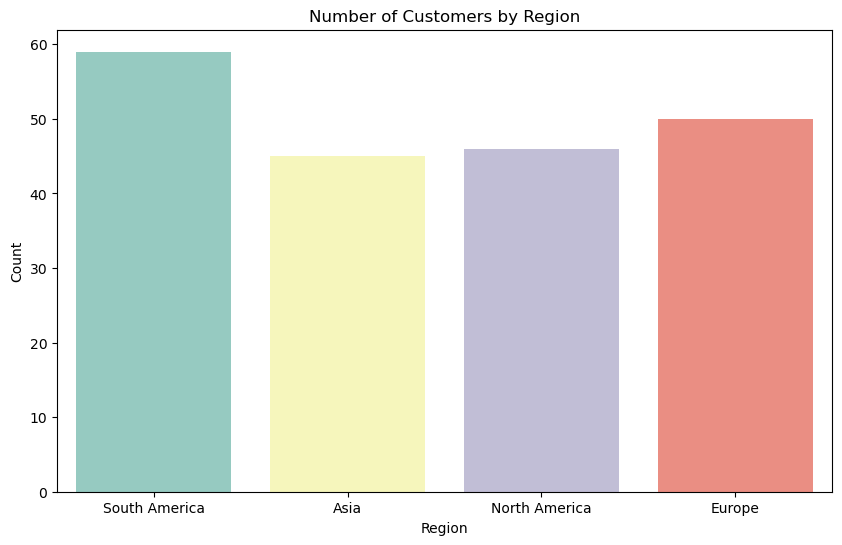

C:\Users\gokul\AppData\Local\Temp\ipykernel_17416\915420517.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_spending, x='Region', y='TotalValue', palette='coolwarm')


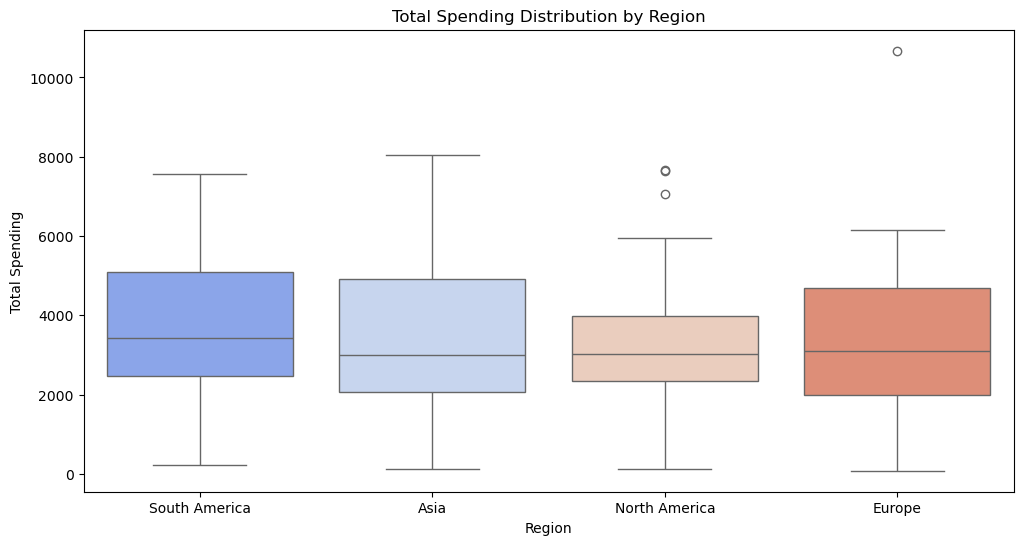

In [6]:
# EDA: Customer Distribution by Region
plt.figure(figsize=(10,6))
sns.countplot(data=customers, x='Region', palette='Set3')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# EDA: Relationship Between Total Spending and Customer Region
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.merge(customers, on='CustomerID', how='left')

plt.figure(figsize=(12,6))
sns.boxplot(data=customer_spending, x='Region', y='TotalValue', palette='coolwarm')
plt.title('Total Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()



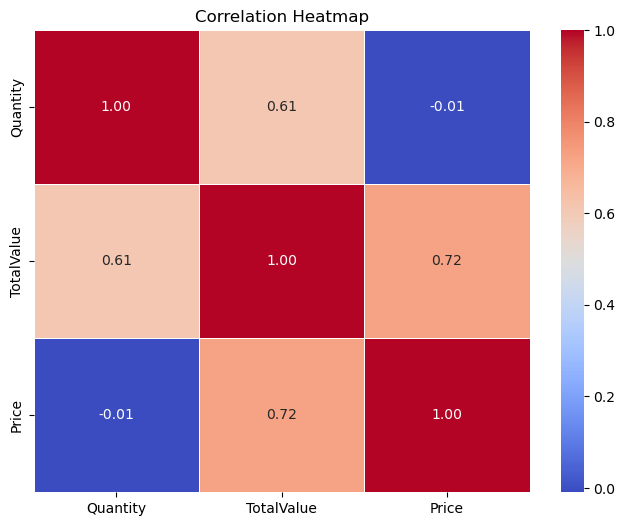

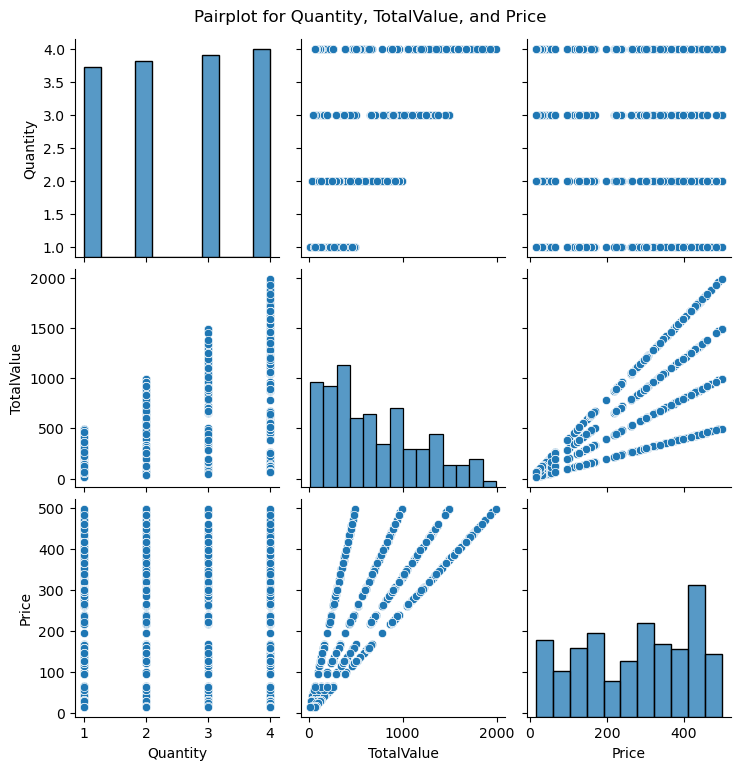

In [7]:
# EDA: Correlation Heatmap for Numeric Columns (Transactions Data)
corr_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# EDA: Pairplot to Understand Relationship Between Multiple Features
sns.pairplot(transactions[['Quantity', 'TotalValue', 'Price']])
plt.suptitle('Pairplot for Quantity, TotalValue, and Price', y=1.02)
plt.show()



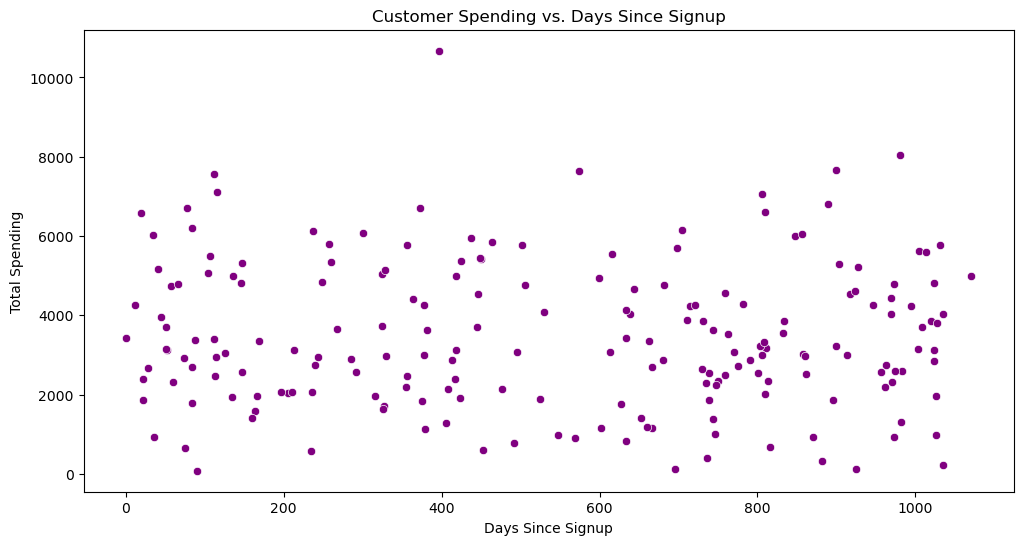

In [8]:
# EDA: Customer Spending vs. Signup Date
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customer_spending['SignupDate'] = customer_spending['CustomerID'].map(customers.set_index('CustomerID')['SignupDate'])
customer_spending['DaysSinceSignup'] = (customer_spending['SignupDate'] - customer_spending['SignupDate'].min()).dt.days

plt.figure(figsize=(12,6))
sns.scatterplot(data=customer_spending, x='DaysSinceSignup', y='TotalValue', color='purple')
plt.title('Customer Spending vs. Days Since Signup')
plt.xlabel('Days Since Signup')
plt.ylabel('Total Spending')
plt.show()